# Video games sales analysis

## Describing project

In this project I will analyze the sales of video games for the online gaming store "Ice". 

The data is compiled from historical records on game sales from open sources, until the end of 2016. It contains the properties of 16,715 games - their name, platform, year of release, genre, sales in the main geographical regions, critic and user scores, and age rating.

The main goal is to find patterns that determine when games will be successful, in order to plan advertising campaigns accordingly.

The main steps will be:
- Exploring the data to learn its contents and to identify issues with its quality that should be addressed.
- Preparing the data for analysis by treating the discovered issues and calculating variables of interest in preparation for analysis, in particular the total sales of each game.
- Analyzing the data to find out how the different properties of games affect their sales.
- Creating a user profile for each region by finding their top platforms and genres, and studying the effects of the age ratings on the sales.
- Testing hypotheses regarding the difference between the average user ratings of the Xbox One and PC platforms, and of the Action and Sports genres.
- Summarizing the overall findings and producing business insights.

## Loading & exploring data

### Importing libraries

In [51]:
# Importing the required libraries
import numpy as np # For mathematical tools, especially arrays
import pandas as pd # For general data analysis tools
import matplotlib.pyplot as plt # For 2D plotting
from scipy import stats as st # For statistical tools

### Loading data

In [52]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - A local runtime
# 2 - A hosted runtime on the interactive Yandex platform
# 3 - A hosted runtime on Google colaboratory
runtime_type = 3

# Setting filepaths
filepath_yandex = '/datasets/'
filepath_google_colab = '/content/drive/My Drive/Colab Notebooks/Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    data = pd.read_csv('games.csv')

elif runtime_type == 2:
    print('A hosted runtime on Yandex interactive platform was chosen.\n')
    data = pd.read_csv(filepath_yandex + 'games.csv')

elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    data = pd.read_csv(filepath_google_colab + 'games.csv')

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either "1", "2" or "3".')

A hosted runtime on Google colaboratory was chosen.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploring data

In [53]:
# Looking at the general information
print('Printing the general information:\n')
data.info()

print('Printing some of the first rows:\n')
display(data.head(10))

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Printing some of the first rows:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [54]:
# Exploring the "Name" column
print('Exploring the "Name" column.\n')
print('The number of rows is: {}'.format(len(data['Name'])) )
print('The number of unique game names is: {}'.format(len(data['Name'].unique())) )

Exploring the "Name" column.

The number of rows is: 16715
The number of unique game names is: 11560


In [55]:
# Exploring the "Platform" column
print('Exploring the "Platform" column.\n')
print('The number of rows is: {}.'.format(len(data['Platform'])) )
print('The number of unique platforms is: {}.\n'.format(len(data['Platform'].unique())) )
print('The unique platforms are:\n', data['Platform'].unique())

Exploring the "Platform" column.

The number of rows is: 16715.
The number of unique platforms is: 31.

The unique platforms are:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Exploring the "Year_of_Release" column.

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64 



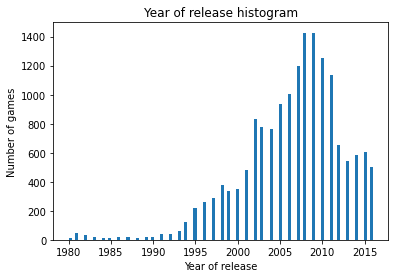

In [56]:
# Exploring the "Year_of_Release" column
print('Exploring the "Year_of_Release" column.\n')
print(data['Year_of_Release'].describe(), '\n')

data['Year_of_Release'].plot(kind='hist', bins=100, title='Year of release histogram')
plt.ylabel('Number of games')
plt.xlabel('Year of release')
plt.show()

We see that in the early days of gaming sales were steadily rising year after year. The distribution is peaked around 2009, but the sales are only dropping since then, perhaps since the hype of the first great consoles has passed. In addition, it's negatively-skewed, as low sales happened in the early years of gaming, especially due to low popularity and the existence of much fewer games.

In [57]:
# Exploring the "Genre" column
print('Exploring the "Genre" column.\n')
print('The number of rows is: {}.'.format(len(data['Genre'])) )
print('The number of unique genres is: {}.\n'.format(len(data['Genre'].unique())) )
print('The unique genres are:\n', data['Genre'].unique())

Exploring the "Genre" column.

The number of rows is: 16715.
The number of unique genres is: 13.

The unique genres are:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Exploring the "NA_sales" column.

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64 



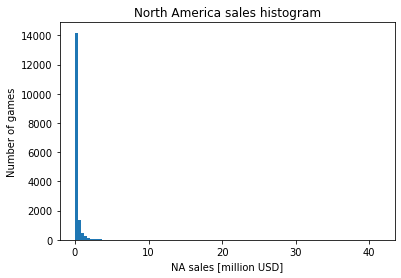

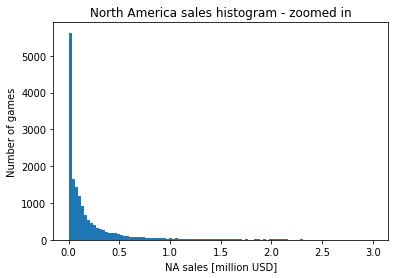

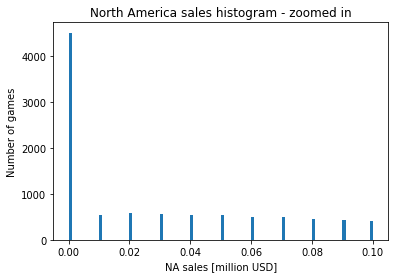

In [58]:
# Exploring the "NA_sales" column
print('Exploring the "NA_sales" column.\n')
print(data['NA_sales'].describe(), '\n')

data['NA_sales'].plot(kind='hist', bins=100, title='North America sales histogram')
plt.ylabel('Number of games')
plt.xlabel('NA sales [million USD]')
plt.show()

data['NA_sales'].plot(kind='hist', bins=100, title='North America sales histogram - zoomed in', range=(0,3))
plt.ylabel('Number of games')
plt.xlabel('NA sales [million USD]')
plt.show()

data['NA_sales'].plot(kind='hist', bins=100, title='North America sales histogram - zoomed in', range=(0,0.1))
plt.ylabel('Number of games')
plt.xlabel('NA sales [million USD]')
plt.show()

We see that the distribution is peaked at the minimal profit, with a very large number of unsuccessful games. Popular games are uncommon, but the few that are popular are extremely popular, reaching tens of million USDs in sales. This is expressed in the distribution being very positively-skewed.

Exploring the "EU_sales" column.

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64 



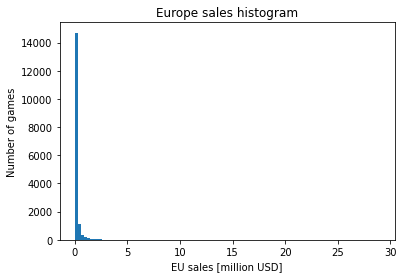

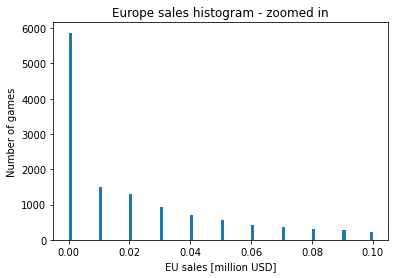

In [59]:
# Exploring the "EU_sales" column
print('Exploring the "EU_sales" column.\n')
print(data['EU_sales'].describe(), '\n')

data['EU_sales'].plot(kind='hist', bins=100, title='Europe sales histogram')
plt.ylabel('Number of games')
plt.xlabel('EU sales [million USD]')
plt.show()

data['EU_sales'].plot(kind='hist', bins=100, title='Europe sales histogram - zoomed in', range=(0,0.1))
plt.ylabel('Number of games')
plt.xlabel('EU sales [million USD]')
plt.show()

We see the same features in the sales distribution in Europe as in North America, except for a slightly lower upper bound for the profits of the most successful games. This points to a slightly smaller gaming economy there.

Exploring the "JP_sales" column.

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64 



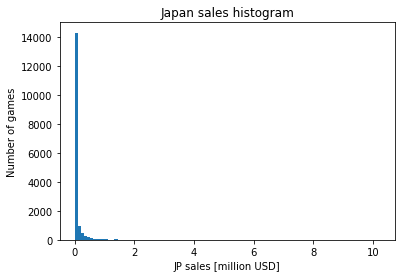

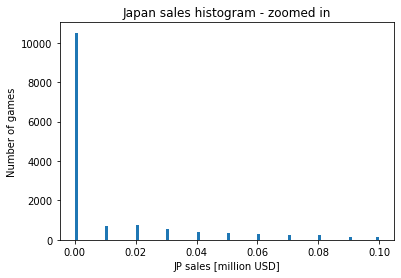

In [60]:
# Exploring the "JP_sales" column
print('Exploring the "JP_sales" column.\n')
print(data['JP_sales'].describe(), '\n')

data['JP_sales'].plot(kind='hist', bins=100, title='Japan sales histogram')
plt.ylabel('Number of games')
plt.xlabel('JP sales [million USD]')
plt.show()

data['JP_sales'].plot(kind='hist', bins=100, title='Japan sales histogram - zoomed in', range=(0,0.1))
plt.ylabel('Number of games')
plt.xlabel('JP sales [million USD]')
plt.show()

We see the same features in the sales distribution in Japan as in the west, except for an even lower upper bound for the profits of the most successful games. This points to an even smaller gaming economy there.

Exploring the "Other_sales" column.

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64 



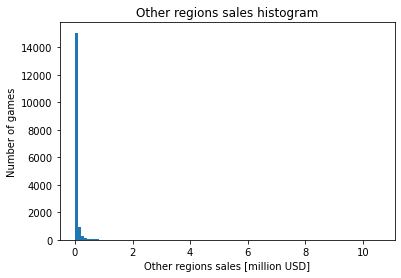

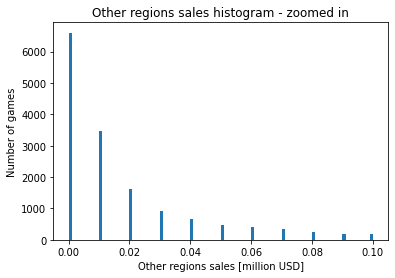

In [61]:
# Exploring the "Other_sales" column
print('Exploring the "Other_sales" column.\n')
print(data['Other_sales'].describe(), '\n')

data['Other_sales'].plot(kind='hist', bins=100, title='Other regions sales histogram')
plt.ylabel('Number of games')
plt.xlabel('Other regions sales [million USD]')
plt.show()

data['Other_sales'].plot(kind='hist', bins=100, title='Other regions sales histogram - zoomed in', range=(0,0.1))
plt.ylabel('Number of games')
plt.xlabel('Other regions sales [million USD]')
plt.show()

The sales in other areas have an even lower peak of unsuccessful games, but it's upper bound for the profits of the most successful games is about the same as in Japan. This puts in perspective how widespread gaming is in the previous regions.

Exploring the "Critic_Score" column.

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64 



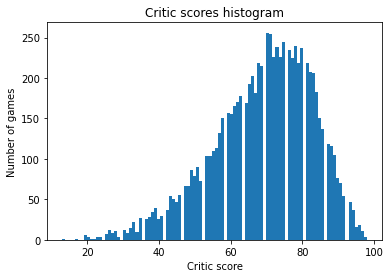

In [62]:
# Exploring the "Critic_Score" column
print('Exploring the "Critic_Score" column.\n')
print(data['Critic_Score'].describe(), '\n')

data['Critic_Score'].plot(kind='hist', bins=100, title='Critic scores histogram')
plt.ylabel('Number of games')
plt.xlabel('Critic score')
plt.show()

We see that the critic scores are negatively-skewed, as there are less very bad games - developers are trying to profit after all. As expected, there are also very few games with perfect scores. 

Exploring the "User_Score" column.

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object 

The percent of rows with "tbd" is: 14.50%.

Exploring the quantitative values in the column.

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64 



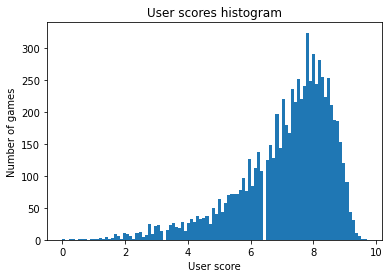

In [63]:
# Exploring the "User_Score" column
print('Exploring the "User_Score" column.\n')
print(data['User_Score'].describe(), '\n')
print('The percent of rows with "tbd" is: {:.2f}%.\n'
    .format(100 * len(data.query('User_Score == "tbd"')) / len(data)))

# Modifying the column for further inspection
# The data type should be quantitative, except for the "tbd" user scores
print('Exploring the quantitative values in the column.\n')
user_scores_for_exploring = data.query('User_Score != "tbd"')['User_Score'].astype(float)
print(user_scores_for_exploring.describe(), '\n')

user_scores_for_exploring.plot(kind='hist', bins=100, title='User scores histogram')
plt.ylabel('Number of games')
plt.xlabel('User score')
plt.show()

We see that the distribution of the user scores behaves like that of the critic scores, but its mean is slightly higher (if we compare them on the same scales, , for example by multiplying the user scores by a factor of 10). This teaches that users are less critical than the critics, which can and should notice more flaws in games.

In [64]:
# Exploring the "Rating" column
print('Exploring the "Rating" column.\n')
print('The number of rows is: {}.'.format(len(data['Rating'])) )
print('The number of unique ratings is: {}.\n'.format(len(data['Rating'].unique())) )
print('The unique ratings are:\n\n', data['Rating'].value_counts())

Exploring the "Rating" column.

The number of rows is: 16715.
The number of unique ratings is: 9.

The unique ratings are:

 E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


### Conclusions

We can identify some problems with the data, which we'll address in the following sections:

- Name - Has missing values.
- Platform - No obvious issues.
- Year_of_Release - Has missing values. Should be converted to integers.
- Genre - Has missing values.
- NA_sales - No obvious issues.
- EU_sales - No obvious issues.
- JP_sales - No obvious issues.
- Other_sales - No obvious issues.
- Critic_Score - Has missing values. Should be scaled to the same range of the user scores for comparability (divided by 10).
- User_Score - Has missing values. Should be converted to real numbers.
- Rating - Has missing values.

## Preparing data

### Editing column names

In [65]:
# Changing the names of the columns to lowercase
col_names_array = data.columns.values
col_names_array_lower = [col_name.lower() for col_name in col_names_array]
data.columns = col_names_array_lower

# Verifying changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Treating quantitative scales

In [66]:
# Scaling the critic scores to the same range of the user scores for comparability
data['critic_score'] = data['critic_score'] / 10

### Treating duplicates

In [67]:
# Looking for duplicated rows
print('The total number of duplicated rows is {}.\n'
    .format(data.duplicated().sum()))

The total number of duplicated rows is 0.



### Treating missing values

In [68]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column are:\n')
print(100 * data.isna().sum() / len(data))

# Treating the missing values
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

data['user_score'].where(data['user_score'] != 'tbd', np.nan, inplace=True)
data['user_score'].fillna(data['user_score'].median(), inplace=True)

data['critic_score'].fillna(data['critic_score'].median(), inplace=True)

data['rating'].fillna("None", inplace=True)

# Calculating the percentage of missing values per column
print('After the changes, the percentages of missing values per column are:\n')
print(100 * data.isna().sum() / len(data))

The percentages of missing values per column are:

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64
After the changes, the percentages of missing values per column are:

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64


### Treating data types

In [69]:
# Presenting the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [70]:
# Converting the data types of variables
data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

In [71]:
# Presenting the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Calculating total sales

Printing statistics of the total sales of each game:



count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

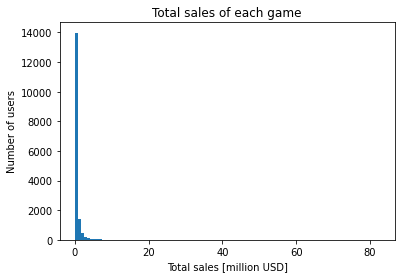

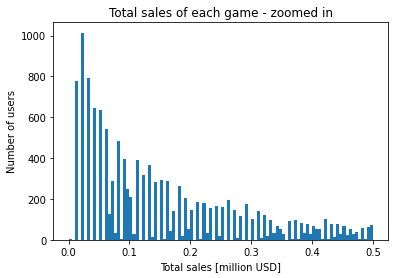

In [72]:
# Calculating the total sales (the sum of sales in all regions) for each game
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Exploring the new column
print('Printing statistics of the total sales of each game:\n')
display(data['total_sales'].describe())
print('\n')

plt.hist(data['total_sales'], bins=100)
plt.title('Total sales of each game')
plt.ylabel('Number of users')
plt.xlabel('Total sales [million USD]')
plt.show()

plt.hist(data['total_sales'], bins=100, range=(0,0.5))
plt.title('Total sales of each game - zoomed in')
plt.ylabel('Number of users')
plt.xlabel('Total sales [million USD]')
plt.show()

The distribution of the total sales behaves similarly to those of the regional sales, since they all possess a similar shape. It's peaked at the minimal profit, with a very large number of unsuccessful games. Popular games are uncommon, but the few that are popular are extremely popular, reaching tens of million USDs in sales. This is expressed in the distribution being very positively-skewed.

### Conclusions

The data didn't contain duplicated rows.

I have treated the following missing values:
- I've deleted the rows with missing values in the "name", "year_of_release" and "genre" columns, due to their very small percentage (under 2% in each).
- I didn't delete the missing values in the "critic_score", "user_score" and "rating" columns, due to their relativly high percentage (over 40% in each). The quantitative missing values were replaced by the median value, since the distribution of the columns isn't symmetric and has some outliers, so it's a better choice than the mean. The missing values with the placeholder "tbd" (to be determined) weren't deleted due to their non-negligible percentage (14.5%). They were treated like the rest of the missing values, since they're not available to us at the time of the analysis. In other circumstances, I would fill them when they become available and repeat the analysis. The missing values of the qualitative column were replaced by a placeholder - the string "None".

I have treated the data types of the following variables:
- I've converted the variables of the "year_of_release" to integers, since a year is an integer and there's no need to use a datetime type for our purposes.
- I've converted the variables of the "user_score" column to real numbers, since the scores contained fractions.

In addition, I've changed the scale of the critic scores (divided them by 10), so that they would be comparable to the user scores.

Finally, I've added the total sales from all of the regions to the data frame.

## Analyzing data

### Release years

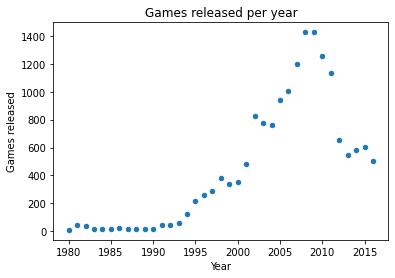

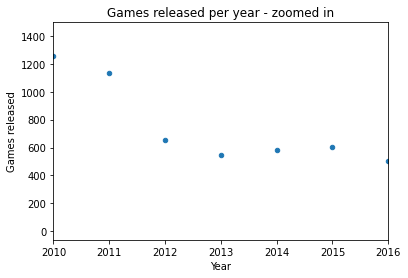

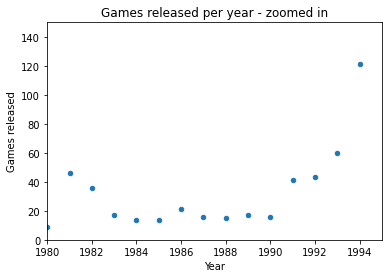

In [73]:
# Checking how many games were released in different years,
# to find out if the data for every period is significant
games_per_year = data.pivot_table(values='name', index='year_of_release', aggfunc='count')
games_per_year = games_per_year.reset_index().rename(columns={"name": "releases"})

# Plotting
axes = games_per_year.plot(x='year_of_release', y='releases', kind='scatter')
plt.title('Games released per year')
plt.ylabel('Games released')
plt.xlabel('Year')
plt.show()

axes = games_per_year.plot(x='year_of_release', y='releases', kind='scatter')
plt.title('Games released per year - zoomed in')
plt.ylabel('Games released')
plt.xlabel('Year')
plt.xlim(2010,2016)
plt.show()

axes = games_per_year.plot(x='year_of_release', y='releases', kind='scatter')
plt.title('Games released per year - zoomed in')
plt.ylabel('Games released')
plt.ylim(0,150)
plt.xlabel('Year')
plt.xlim(1980,1995)
plt.show()


We see that not every period has a significant amount of data, and the data before 1993 can be chosen to be disregarded, since it accounts for less than a few percents of the entire data.

As we recall from the data exploration section, in the early days of gaming sales were steadily rising year after year. The distribution is peaked around 2009, but the sales are only dropping since then, perhaps since the hype of the first great consoles has passed. In addition, it's negatively-skewed, as low sales happened in the early years of gaming, especially due to low popularity and the existence of much fewer games.

In [74]:
# Checking how much of the data is found before a certain year of release
release_years = np.sort(data['year_of_release'].unique()) # Numpy array of integers

release_year_data_percent = np.zeros((len(release_years),2)) # 2D array for saving results
for i in range(0,len(release_years)):
    year_top_limit = release_years[i]
    data_percent = 100 * len(data.query('year_of_release < @year_top_limit')) / len(data)
    release_year_data_percent[i,0] = year_top_limit
    release_year_data_percent[i,1] = data_percent
release_year_data_percent = pd.DataFrame(release_year_data_percent, columns=('year','percent'))

print('The percent of the data found before a certain year of release is (not including the year):\n')
display(release_year_data_percent)

The percent of the data found before a certain year of release is (not including the year):



,year,percent
0,1980.0,0.000000
1,1981.0,0.054731
2,1982.0,0.334468
3,1983.0,0.553393
4,1984.0,0.656775
5,1985.0,0.741912
6,1986.0,0.827049
7,1987.0,0.954756
8,1988.0,1.052055
9,1989.0,1.143274


### Platforms - all time

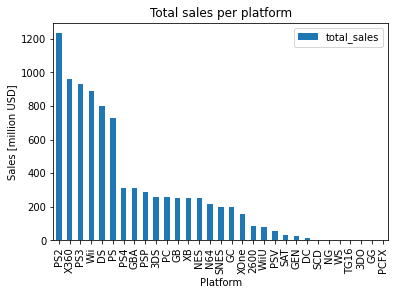



Presenting statistics:



,total_sales
count,31.000000
mean,284.334516
std,343.954144
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000




The bottom outlier limit is -396.43 and the top limit is 719.79.


In [75]:
# Looking at how sales varied between platforms
# Finding the total sales per platform
sales_per_platform = data.pivot_table(values='total_sales', index='platform', aggfunc='sum') \
                    .sort_values('total_sales', ascending=False) \
                    .rename_axis(None, axis="index")

# Plotting reults
sales_per_platform.plot(kind='bar')
plt.title('Total sales per platform')
plt.ylabel('Sales [million USD]')
plt.xlabel('Platform')
plt.show()
print('\n')

# Calculating statistics
print('Presenting statistics:\n')
display(sales_per_platform.describe())
print('\n')

# Calculating the limit of the outliers
Q1 = sales_per_platform['total_sales'].quantile(0.25)
Q3 = sales_per_platform['total_sales'].quantile(0.75)
IQR = Q3 - Q1
outliers_bot = Q1 - 1.5*IQR
outliers_top = Q3 + 1.5*IQR
print('The bottom outlier limit is {:.2f} and the top limit is {:.2f}.'
    .format(outliers_bot, outliers_top))

We see that a handful of platforms are making over an order of magnitude higher profit than the others. The PS2 is the clear winner, while the profits of many older platforms are barely visible, and the newest platforms didn't have enough time to prove themselves.

The platforms with the greatest total sales are:
 PS2, X360, PS3, Wii, DS, PS 

Plotting the sales per year for the top platforms:



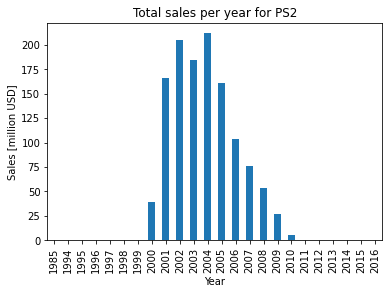

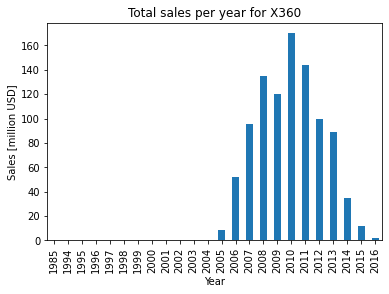

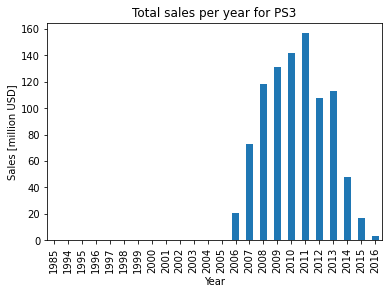

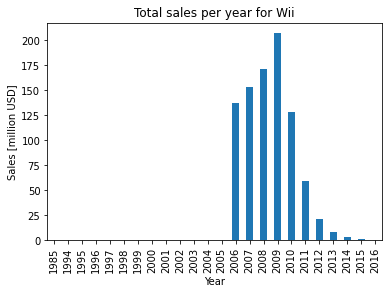

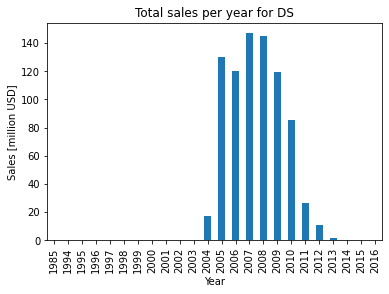

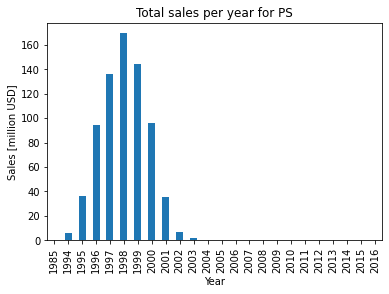

In [76]:
# Finding the platforms with the greatest total sales
top_num = 6 # Number of top platforms to present
top_platforms = sales_per_platform.index.values[0:top_num]
print('The platforms with the greatest total sales are:\n', ', '.join(top_platforms), '\n')

# Looking at the sales of the top platforms for each year
sales_per_platform_per_year_top = data.query('platform in @top_platforms') \
                        .pivot_table(values='total_sales', 
                                     index='platform',
                                     columns='year_of_release',
                                     aggfunc='sum')

# Plotting
print('Plotting the sales per year for the top platforms:\n')
for platform in top_platforms:
    sales_per_platform_per_year_top.loc[platform,:].plot(kind='bar')
    plt.title('Total sales per year for {}'.format(platform))
    plt.ylabel('Sales [million USD]')
    plt.xlabel('Year')
    plt.show()

The most popular platforms have a typical lifetime of about a decade, where the rise in popularity is sometimes more abrupt than the fall, showcasing the excitement over the new product.

In [77]:
# Finding unpopular platforms
# Finding the platforms that have zero sales now
sales_per_platform_per_year = data.pivot_table(values='total_sales',
                                               index='platform',
                                               columns='year_of_release',
                                               aggfunc='sum')

unpopular_platforms = sales_per_platform_per_year \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns") \
    .rename(columns={2016: "current_year"}).fillna(0).query('current_year == 0') \
    .index.values
    
print('The platforms that don\'t sell anymore are:\n', ', '.join(unpopular_platforms), '\n')

# Finding the platforms that used to be popular but have zero sales now
unpopular_platforms_top = sales_per_platform_per_year_top \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns") \
    .rename(columns={2016: "current_year"}).fillna(0).query('current_year == 0') \
    .index.values

print('The platforms that used to be popular but don\'t sell anymore are:\n',
      ', '.join(unpopular_platforms_top))

The platforms that don't sell anymore are:
 2600, 3DO, DC, DS, GB, GBA, GC, GEN, GG, N64, NES, NG, PCFX, PS, PS2, PSP, SAT, SCD, SNES, TG16, WS, XB 

The platforms that used to be popular but don't sell anymore are:
 DS, PS, PS2


Plotting the sales per year for each platform:



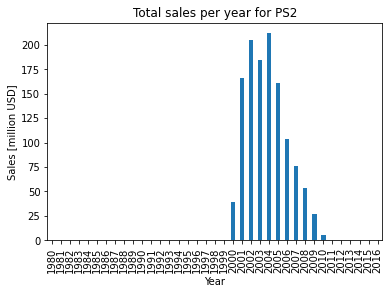

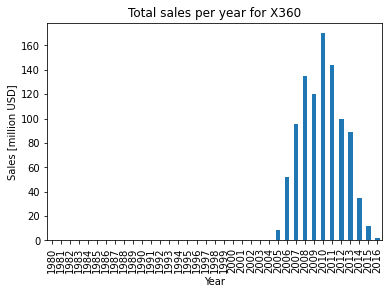

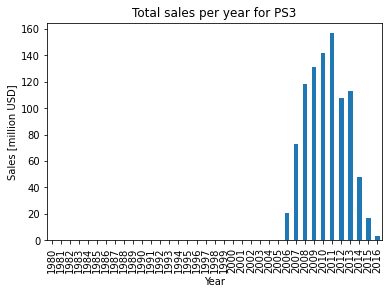

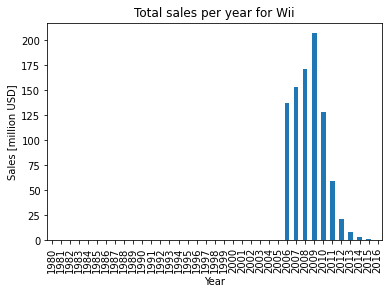

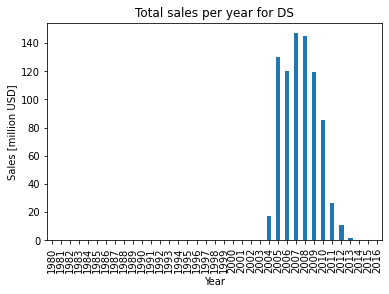

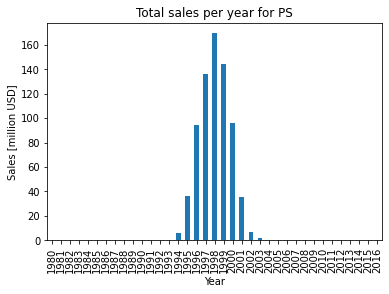

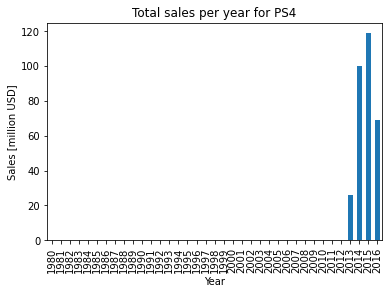

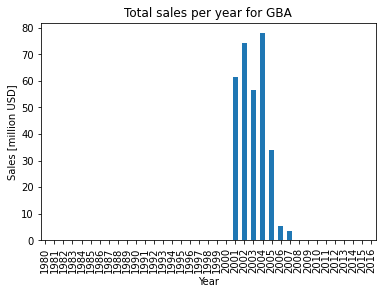

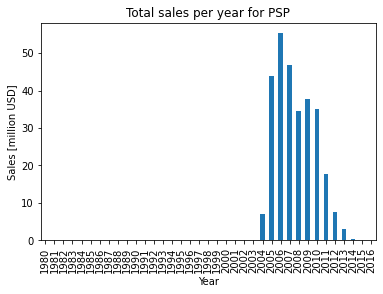

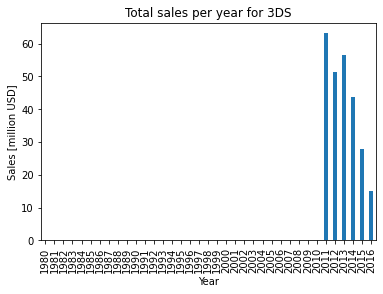

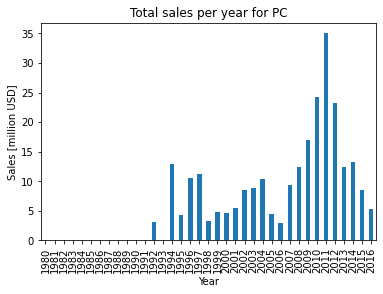

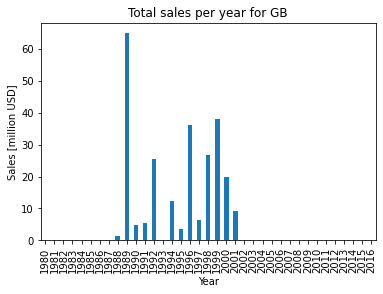

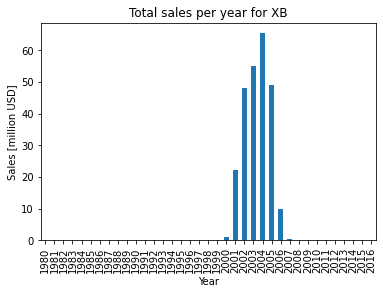

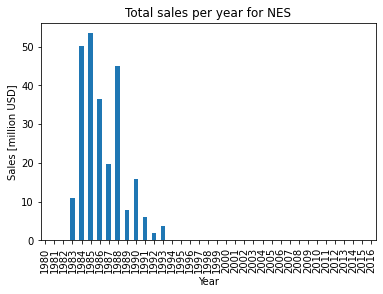

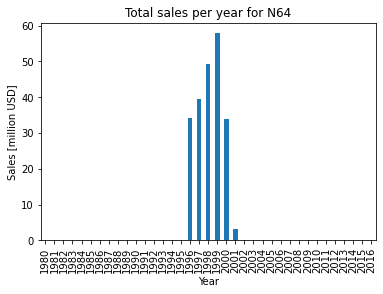

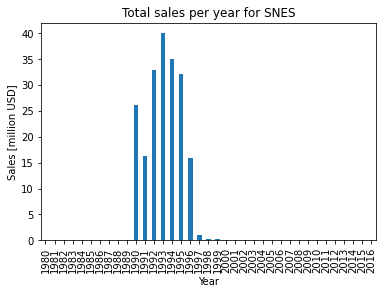

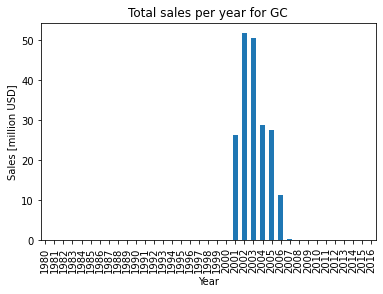

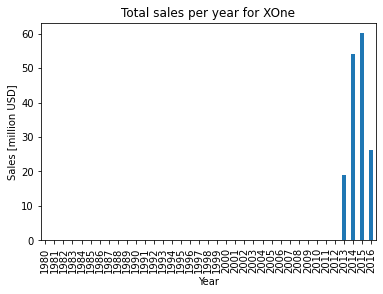

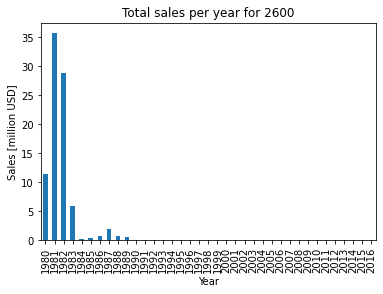

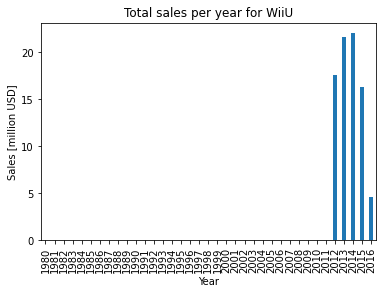

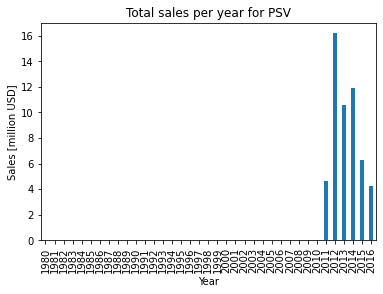

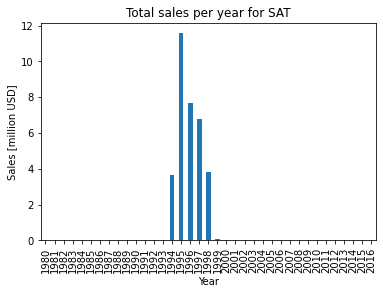

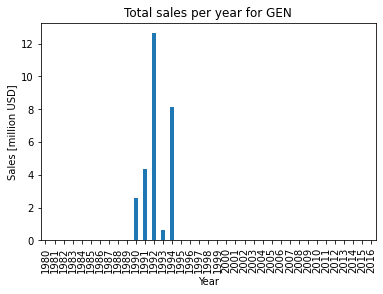

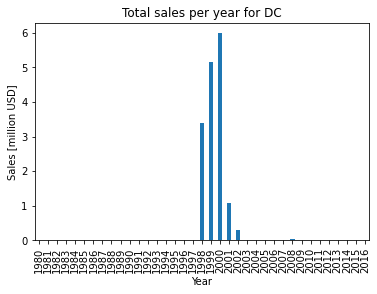

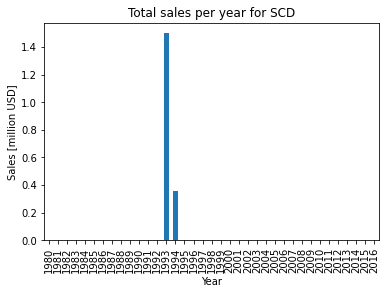

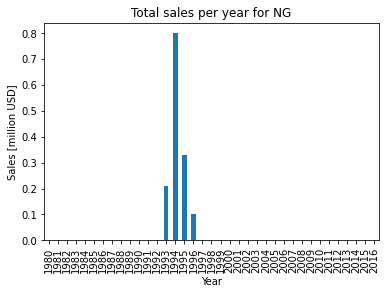

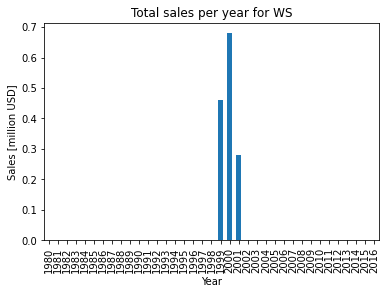

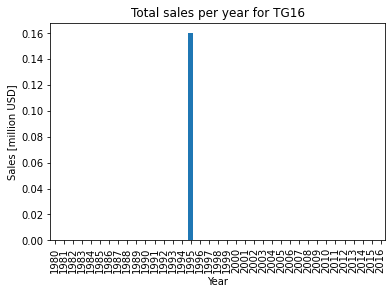

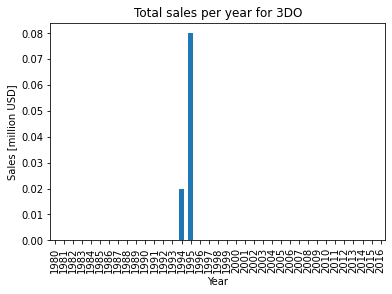

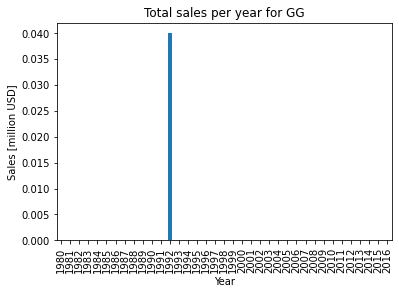

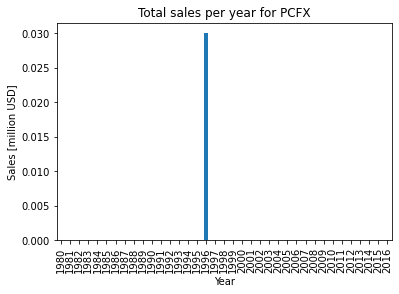

In [78]:
# Plotting the sales per year for each platform 
print('Plotting the sales per year for each platform:\n')
platforms = sales_per_platform.index.values
sales_per_platform_per_year = data.query('platform in @platforms') \
                        .pivot_table(values='total_sales', 
                                     index='platform',
                                     columns='year_of_release',
                                     aggfunc='sum')

# Plotting
for platform in platforms:
    sales_per_platform_per_year.loc[platform,:].plot(kind='bar')
    plt.title('Total sales per year for {}'.format(platform))
    plt.ylabel('Sales [million USD]')
    plt.xlabel('Year')
    plt.show()

It typically takes about a decade for new platforms to appear and old ones to fade, but there are some platforms, usually old or unpopular, which only survived for half of that period or even less.

### Selecting relevant years

In [79]:
# Selecting the relevant data that would allow to build a prognosis for 2017
year_choice = 2014
data_relevant_years = data.query('year_of_release >= @year_choice')

# Printing the general information of the selected data
data_relevant_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


### Platforms

Finding which platforms are leading in sales.



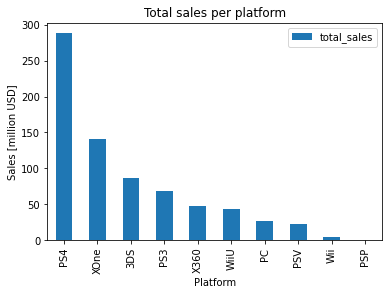



The platforms with the greatest total sales after selecting the relevant years are: PS4, XOne, 3DS 

The total sales are:



,total_sales
PS4,288.15
XOne,140.36
3DS,86.68


In [80]:
# Finding which platforms are leading in sales
print('Finding which platforms are leading in sales.\n')
sales_per_platform = data_relevant_years.pivot_table(values='total_sales',
                                                     index='platform',
                                                     aggfunc='sum') \
                    .sort_values('total_sales', ascending=False) \
                    .rename_axis(None, axis="index")

# Presenting results
sales_per_platform.plot(kind='bar')
plt.title('Total sales per platform')
plt.ylabel('Sales [million USD]')
plt.xlabel('Platform')
plt.show()
print('\n')

top_num = 3 # Number of top platforms to present
top_platforms = sales_per_platform.index.values[0:top_num]
print('The platforms with the greatest total sales after selecting the relevant years are:',
      ', '.join(top_platforms), '\n')
print('The total sales are:\n')
display(sales_per_platform.head(top_num))
print('\n')

Plotting the sales per year for each platform:



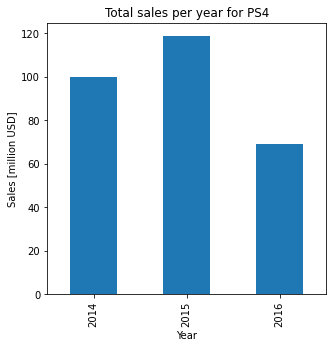

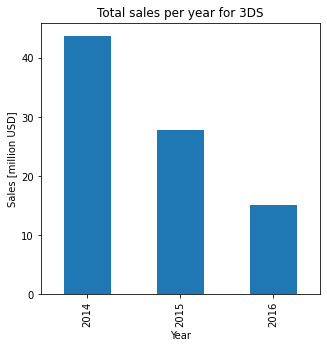

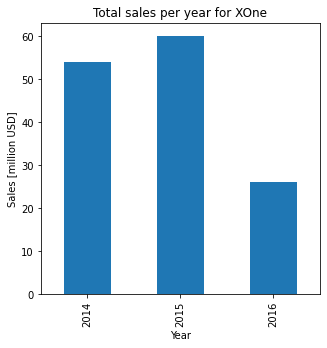

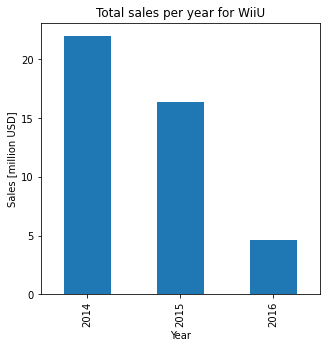

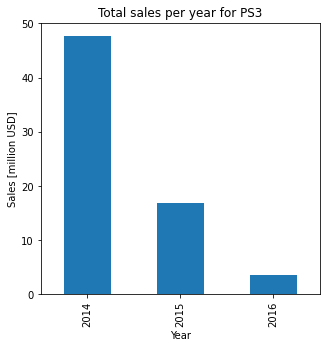

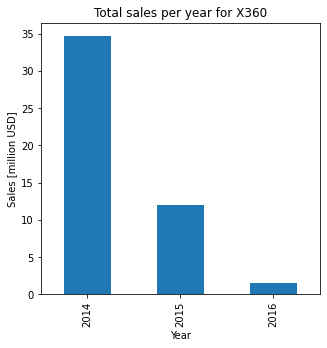

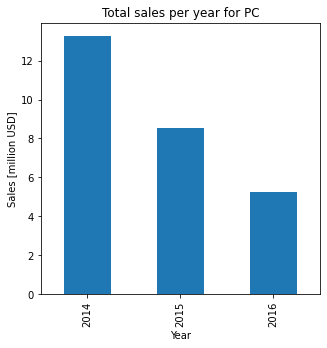

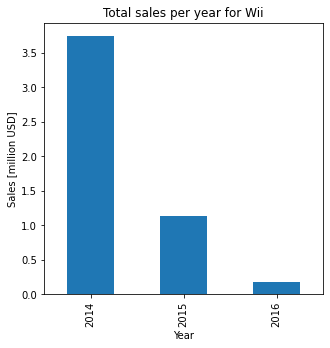

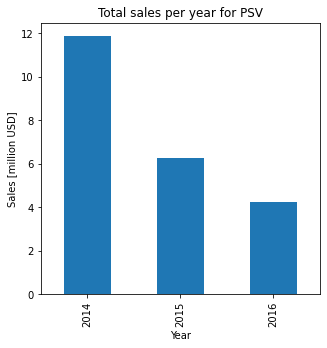

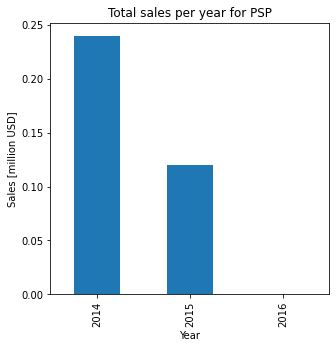

In [81]:
# Finding which platforms are growing or shrinking
# Looking at the sales of the top platforms for each year
sales_per_platform_per_year = data_relevant_years.pivot_table(values='total_sales', 
                                                        index='platform',
                                                        columns='year_of_release',
                                                        aggfunc='sum')

# Plotting
print('Plotting the sales per year for each platform:\n')
platforms = data_relevant_years['platform'].unique()
for platform in platforms:
    sales_per_platform_per_year.loc[platform,:].plot(kind='bar', figsize=(5,5))
    plt.title('Total sales per year for {}'.format(platform))
    plt.ylabel('Sales [million USD]')
    plt.xlabel('Year')
    plt.show()

The platforms that are growing in sales are the PS4 and XBox One, and these are chosen as the potentially profitable platforms. The rest are shrinking in sales.

Global sales statistics for 3DS:
 count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64 



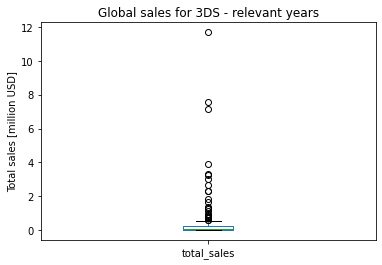



Global sales statistics for PC:
 count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64 



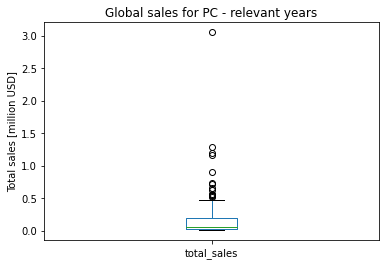



Global sales statistics for PS3:
 count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: total_sales, dtype: float64 



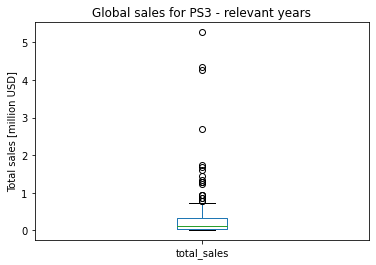



Global sales statistics for PS4:
 count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64 



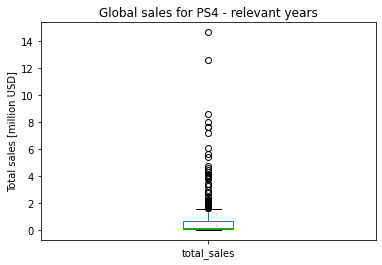



Global sales statistics for PSP:
 count    13.000000
mean      0.027692
std       0.027735
min       0.010000
25%       0.010000
50%       0.020000
75%       0.020000
max       0.090000
Name: total_sales, dtype: float64 



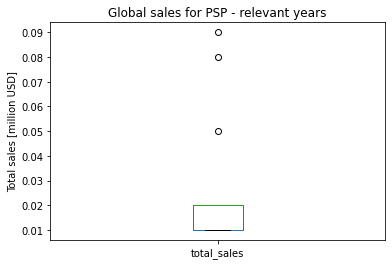



Global sales statistics for PSV:
 count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: total_sales, dtype: float64 



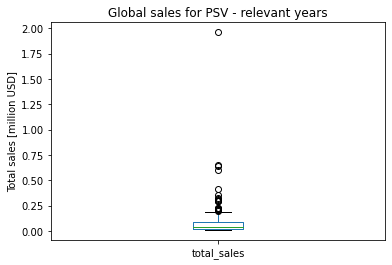



Global sales statistics for Wii:
 count    11.000000
mean      0.460909
std       0.625451
min       0.010000
25%       0.035000
50%       0.180000
75%       0.755000
max       2.010000
Name: total_sales, dtype: float64 



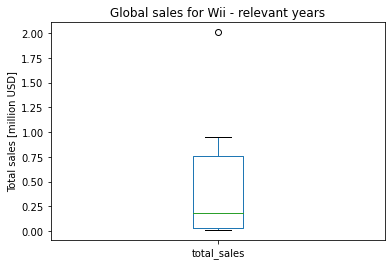



Global sales statistics for WiiU:
 count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64 



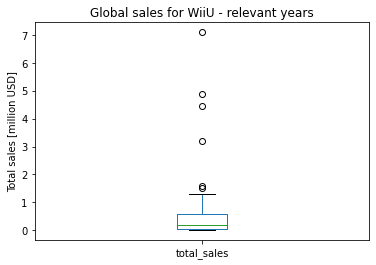



Global sales statistics for X360:
 count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: total_sales, dtype: float64 



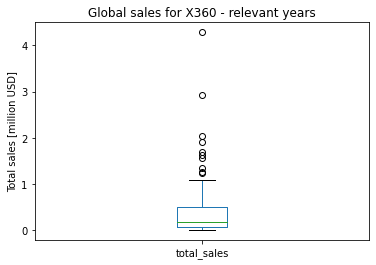



Global sales statistics for XOne:
 count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64 



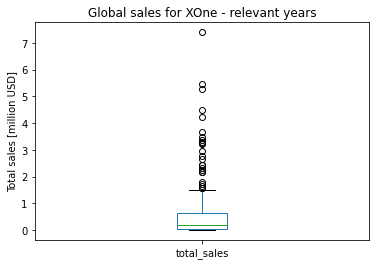

In [82]:
# Plotting boxplots for the global sales of all games, broken down by platform
platforms = np.sort(data_relevant_years['platform'].unique()) # Numpy array of strings

for platform in platforms:
    total_sales_platform = data_relevant_years.query('platform == @platform')['total_sales']
    print('Global sales statistics for {}:\n'.format(platform),
          total_sales_platform.describe(), '\n')
    
    # Plotting
    total_sales_platform.plot(kind='box')
    plt.title('Global sales for {} - relevant years'.format(platform))
    plt.ylabel('Total sales [million USD]')
    plt.show()
    print('\n')

The boxplots help express how the data contains platforms that are both sharply rising and falling in popularity, which is seen in the significant differences between the means - some platforms outsell others by about an order of magnitude. For the successful platforms, many very far outliers exist, which bring much higher profits in comparison to the average game.

The mean total sales of the platforms from the relevant years:



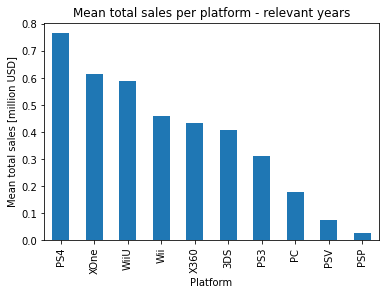

,total_sales
platform,
PS4,0.766356
XOne,0.615614
WiiU,0.588767
Wii,0.460909
X360,0.434414
3DS,0.408868
PS3,0.311324
PC,0.179139
PSV,0.075932


In [83]:
# Comparing the mean total sales of the platforms
# Calculating the necessary variables
total_sales_platform_means = data_relevant_years.pivot_table(values='total_sales',
                                                             index='platform',
                                                             aggfunc='mean') \
                            .sort_values('total_sales', ascending=False)

# Presenting results
print('The mean total sales of the platforms from the relevant years:\n')
total_sales_platform_means['total_sales'].plot(kind='bar')
plt.title('Mean total sales per platform - relevant years')
plt.ylabel('Mean total sales [million USD]')
plt.xlabel('Platform')
plt.show()
print('\n')

display(total_sales_platform_means)

The differences in total sales are significant - the total sales of the most profitable platforms reach about 750k USD, while those of the least profitable platforms are only around 100k USD.

Finding the unique games on the PS4.

There are 376 games on the PS4.

The total sales of these games on other platforms are:



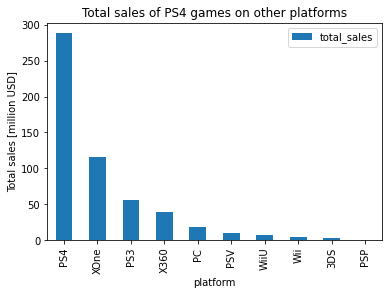

,total_sales
platform,
PS4,288.15
XOne,116.44
PS3,56.08
X360,40.07
PC,17.91
PSV,10.03
WiiU,8.02
Wii,4.80
3DS,3.81


In [84]:
# Comparing the sales of the games of a certain popular platform on other platforms
# Finding the unique games
platform_choice = 'PS4'
print('Finding the unique games on the {}.\n'.format(platform_choice))
unique_games = data_relevant_years \
                .query('platform == @platform_choice')['name'].unique() # Numpy array of strings
print('There are {} games on the {}.\n'.format(len(unique_games), platform_choice))

# Filtering the data for these games
data_unique_games = data_relevant_years.query('name in @unique_games')
sales_per_platform_unique_games = data_unique_games.pivot_table(index='platform',
                                                                values='total_sales',
                                                                aggfunc='sum') \
                                .sort_values('total_sales', ascending=False)

# Presenting results
print('The total sales of these games on other platforms are:\n')
sales_per_platform_unique_games.plot(kind='bar')
plt.title('Total sales of {} games on other platforms'.format(platform_choice))
plt.ylabel('Total sales [million USD]')
plt.show()
print('\n')

display(sales_per_platform_unique_games)

Comparing the sales of the games of one platform on other platforms, we see that the sales drop drastically in most of the other platforms. PS4 games make only a 1/3 of the profit on the XBox One, and only a 1/6 on the PS3, etcetera. This can be explained by the differences between the platforms themselves. Different plaforms have different technical specifications and peripheral equipment, so games that are created for one platform won't give the same quality of experience in another platform. In addition, not all games are available for every platform - on the contrary - new games are developed for new platforms, to utilize their novel technologies and provide a reason to buy them.

### Scores

The platforms with the most games are: PS4, PSV, XOne, PS3, 3DS 

The amounts of games per platform are:



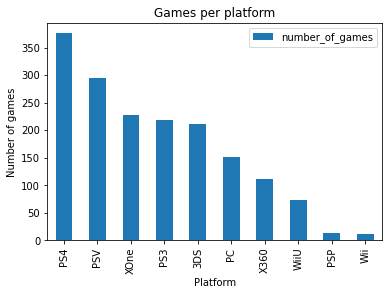

,number_of_games
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


In [85]:
# Finding the platforms with the most games
top_num = 5 # Number of results to print
platform_games = data_relevant_years.pivot_table(index='platform',
                                                 values='name',
                                                 aggfunc='count') \
                                    .rename(columns={"name": "number_of_games"}) \
                                    .sort_values('number_of_games', ascending=False)

print('The platforms with the most games are:',
    ', '.join(platform_games.index.values[0:top_num]), '\n')

# Presenting results
print('The amounts of games per platform are:\n')
platform_games.plot(kind='bar')
plt.title('Games per platform')
plt.ylabel('Number of games')
plt.xlabel('Platform')
plt.show()
print('\n')

display(platform_games)

Again we see how the most successful platforms overshadow the less popular competitors.

The correlations between the total sales and the critic and user reviews for the PS4 are:



,total_sales,critic_score,user_score
total_sales,1.000000,0.333615,-0.064075
critic_score,0.333615,1.000000,0.496274
user_score,-0.064075,0.496274,1.000000


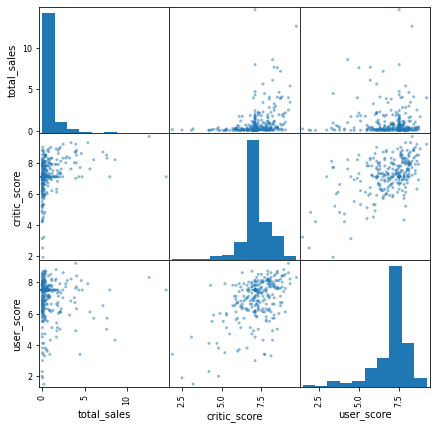

In [86]:
# Checking how user and critic reviews affect sales for a popular platform
platform_choice = "PS4"
data_for_corr = data_relevant_years.query('platform == @platform_choice') \
                    .loc[:,['total_sales','critic_score','user_score']]

# Calculating the correlations
print('The correlations between the total sales and the critic and user reviews for the {} are:\n'
    .format(platform_choice))
display(data_for_corr.corr())
print('\n')
scatter_matrix = pd.plotting.scatter_matrix(data_for_corr, figsize=(7,7))

For the PS4, there's a medium correlation between the total sales and the critic scores (~0.3 Pearson correlation coefficient), but practically no correlation with the user scores. This makes sense, as professional scores should be more precise and objective, so gamers rely on them more for purchases.

### Genres

The most successful genres are: Action, Shooter, Sports, Role-Playing, Misc 

The total sales per genre are:



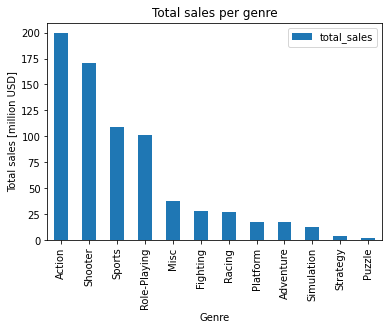

In [87]:
# Analyzing the distribution of the total sales of all of the games per genre
sales_genre = data_relevant_years.pivot_table(index='genre',
                                                 values='total_sales',
                                                 aggfunc='sum') \
                                    .sort_values('total_sales', ascending=False)

# Presenting results
num_top = 5
print('The most successful genres are: {}'
    .format(', '.join(sales_genre.index.values[0:num_top])), '\n')

print('The total sales per genre are:\n')
sales_genre.plot(kind='bar')
plt.title('Total sales per genre')
plt.ylabel('Total sales [million USD]')
plt.xlabel('Genre')
plt.show()

Let's look closer to see if there are unique features to the distribution of the total sales in each genre.

The distribution of total sales per genre:



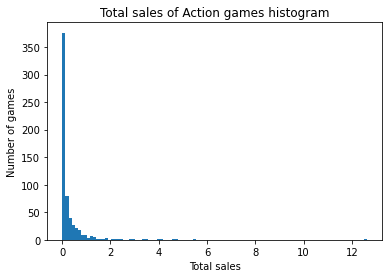

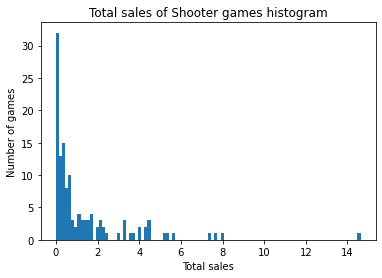

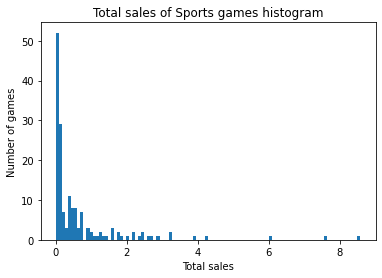

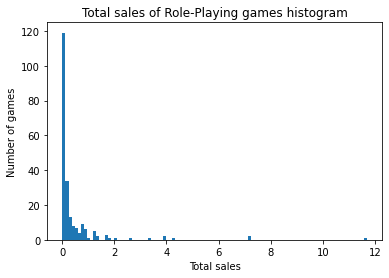

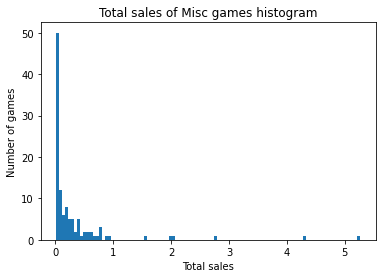

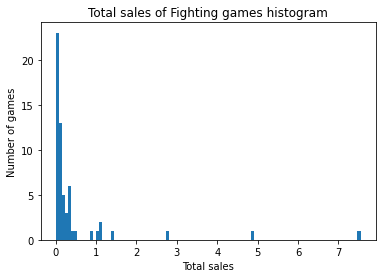

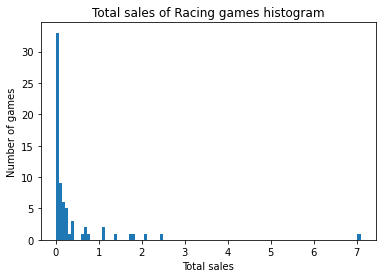

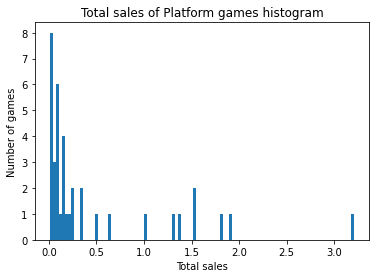

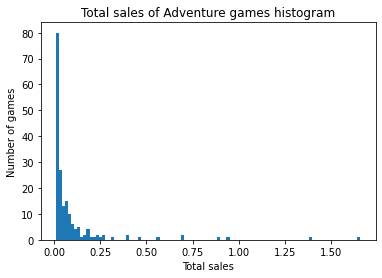

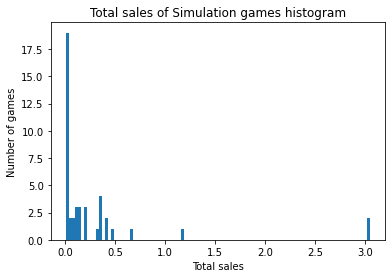

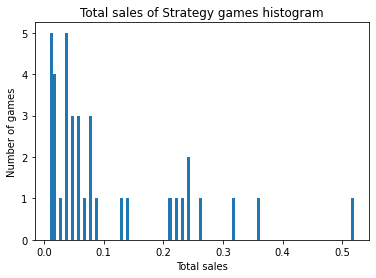

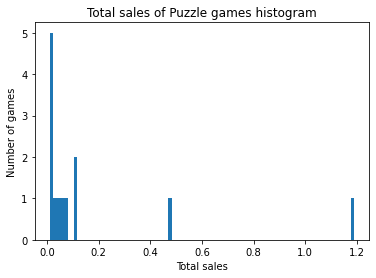

In [88]:
# Analyzing the distributions of the total sales per game per genre
print('The distribution of total sales per genre:\n')
genres = sales_genre.index.values # Using this source to get genres sorted by total sales
for genre in genres:
    genre_total_sales = data_relevant_years.query('genre == @genre')['total_sales']
    genre_total_sales.plot(kind='hist', bins=100)
    plt.title('Total sales of {} games histogram'.format(genre))
    plt.ylabel('Number of games')
    plt.xlabel('Total sales')
    plt.show()

The numbers of games per genre are:



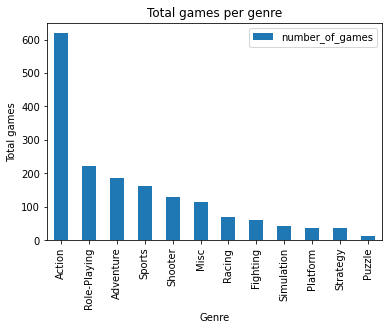

In [89]:
# Analyzing the number of games per genre
games_genre = data_relevant_years.pivot_table(index='genre',
                                                 values='name',
                                                 aggfunc='count') \
                                    .rename(columns={'name':'number_of_games'}) \
                                    .sort_values('number_of_games', ascending=False)

# Presenting results
print('The numbers of games per genre are:\n')
games_genre.plot(kind='bar')
plt.title('Total games per genre')
plt.ylabel('Total games')
plt.xlabel('Genre')
plt.show()

A possible explanation for the success of a genre is just the taste of the gamers - people seek to experience the more exciting emotion from games. This in turn brings better game developers to the loved genres, which further increases their success. The most profitable genres don't necessarily possess the largest amounts of games, so this parameter doesn't explain their success. In addition, there are no unique features in the histograms of the profits per game for the successful and unseccessful genres. Some distributions have a very large amount of outliers and some not, some have a very large amount of low selling games and some not, etcetera. We do notice that there are much more action games than in other genres, but this may be an outcome of the popularity of the genre instead of a reason for the high sales. Also, this can happen due to "action" being an umbrella term that just fits many games.

### Conclusions

Conclusions regarding years of release:
- Not every period has a significant amount of data, and the data before 1993 can be chosen to be disregarded, since it accounts for less than 2% of the entire data.

Conclusions regarding platforms:
- The platforms with the greatest total sales are:
 PS2, X360, PS3, Wii, DS, PS.
- The platforms that used to be popular but don't sell anymore are:
 DS, PS, PS2.
- It typically takes about a decade for new platforms to appear and old ones to fade, but there are some platforms, usually old or unpopular, which only survived for half of that period or even less.
---
- I have taken the data since 2014 as the relevant data for further analysis, because this seems like the year when the popular platforms of the previous generation practically faded. In particular, the XBox 360 and PS3 statistically reached their last couple of years, and the DS and Wii basically stopped selling. Also, this is when the next generation platforms made a great leap in sales - namely the XBox One and the PS4. We know that statistically only the latter platforms will raise in sales from this point.
- The platforms with the greatest total sales after selecting the relevant years are: PS4, XOne, 3DS.
- The platforms that are growing in sales are the PS4 and XBox One, and these are chosen as the potentially profitable platforms. The rest are shrinking in sales.
- The differences in total sales are significant - the total sales of the most profitable platforms reach about 750k USD, while those of the least profitable platforms are only around 100k USD.
- The differences in mean sales are significant - the mean sales of the most profitable platforms are almost an order of magnitude higher than those of the least profitable ones.
- The boxplots help express how the data contains platforms that are both sharply rising and falling in popularity, which is seen in the significant differences between the means - some platforms outsell others by about an order of magnitude. For the successful platforms, many very far outliers exist, which bring much higher profits in comparison to the average game.
---
- Comparing the sales of the games of one platform on other platforms, we see that the sales drop drastically in most of the other platforms. PS4 games make only a 1/3 of the profit on the XBox One, and only a 1/6 on the PS3, etcetera. This can be explained by the differences between the platforms themselves. Different plaforms have different technical specifications and peripheral equipment, so games that are created for one platform won't give the same quality of experience in another platform. In addition, not all games are available for every platform - on the contrary - new games are developed for new platforms, to utilize their novel technologies and provide a reason to buy them.

Conclusions regarding scores:
- For the PS4, there's a medium correlation between the total sales and the critic scores (~0.3 Pearson correlation coefficient), but practically no correlation with the user scores. This makes sense, as professional scores should be more precise and objective, so gamers rely on them more for purchases.

Conclusions regarding genres:
- The most successful genres are: Action, Shooter, Sports, Role-Playing, Misc.
- A possible explanation for the success of a genre is just the taste of the gamers - people seek to experience the more exciting emotion from games. This in turn brings better game developers to the loved genres, which further increases their success. The most profitable genres don't necessarily possess the largest amounts of games, so this parameter doesn't explain their success. In addition, there are no unique features in the histograms of the profits per game for the successful and unseccessful genres. Some distributions have a very large amount of outliers and some not, some have a very large amount of low selling games and some not, etcetera.

## Creating region profiles

### Top platforms

In [90]:
# Finding the top platforms
top_num = 5 # Number of top platforms to find
regions = ['na', 'eu', 'jp']
for region in regions:
    pivot_sales_platform = data_relevant_years.pivot_table(index='platform',
                                                           values='{}_sales'.format(region),
                                                           aggfunc='sum') \
                            .sort_values('{}_sales'.format(region), ascending=False)
    top_platforms = pivot_sales_platform.index.values[0:top_num]
    print('The top platforms in {} are:'.format(region.upper()), ', '.join(top_platforms))

The top platforms in NA are: PS4, XOne, X360, 3DS, PS3
The top platforms in EU are: PS4, XOne, PS3, PC, 3DS
The top platforms in JP are: 3DS, PS4, PSV, PS3, WiiU


The sales shares of the top platforms in NA are:



,sales_ratios
PS4,0.347145
XOne,0.286102
X360,0.099627
3DS,0.079701
PS3,0.077624
Other,0.890199


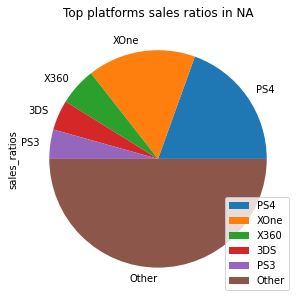



The sales shares of the top platforms in EU are:



,sales_ratios
PS4,0.480420
XOne,0.170866
PS3,0.094355
PC,0.066388
3DS,0.059554
Other,0.871583


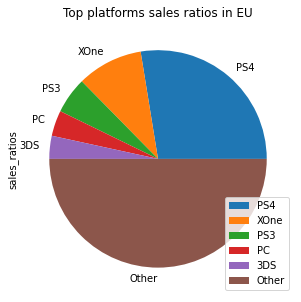



The sales shares of the top platforms in JP are:



,sales_ratios
3DS,0.475239
PS4,0.161349
PSV,0.156193
PS3,0.120529
WiiU,0.078526
Other,0.991836


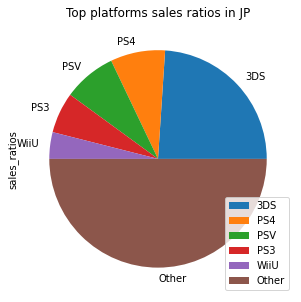

In [91]:
# Calculating the sales share of the top platforms in different regions
top_num = 5 # Number of top platforms to find
regions = ['na', 'eu', 'jp']
for region in regions:
    top_platforms_share = data_relevant_years.pivot_table(index='platform',
                                                         values='{}_sales'.format(region),
                                                         aggfunc='sum') \
                        .sort_values('{}_sales'.format(region), ascending=False).reset_index()
    # Calculating the total amount of sales
    total_sales = top_platforms_share['{}_sales'.format(region)].sum()
    # Adding the sales ratio
    top_platforms_share['sales_ratios'] = top_platforms_share['{}_sales'.format(region)] / total_sales
    # Keeping top platforms
    top_platforms_share = top_platforms_share.loc[0:top_num-1]
    # Adding the data of the non-top platforms
    top_platforms_share.loc[top_num,:] = \
        ['Other', top_platforms_share['{}_sales'.format(region)].sum(), top_platforms_share['sales_ratios'].sum()]
    # Keeping the relevant data
    top_platforms_share = top_platforms_share.set_index('platform') \
        .rename_axis(None, axis="index").pop('sales_ratios').to_frame()

    # Presenting results
    print('The sales shares of the top platforms in {} are:\n'.format(region.upper()))
    display(top_platforms_share)
    print('\n')

    plot = top_platforms_share.plot(y='sales_ratios', kind='pie', figsize=(5,5))
    plt.title('Top platforms sales ratios in {}'.format(region.upper()))
    plt.legend(loc='lower right')
    plt.show()
    print('\n')

We see that the top platforms in all of the regions have a similar behavior in their sales shares - the most popular platform has 30%-50% of the shares, and the less popular a platform gets, the more its share shrinks. That's because when a product becomes successful, the more it can overshadow its competitors due to its greater quality and advertising. We also see similar platforms appearing in all of the regions. This can be explained by a good platform becoming popular and considered good everywhere. The differences in the popularities within the top platforms in the different regions can be explained by their origin, which has a strong effect. The XBox is manufactured in the NA, and is indeed the 2nd most popular in the west, but it doesn't even reach the top 5 in Japan. Nintendo consoles behave the opposite - they're manufactured in Japan and are the most popular there, but they're less popular in the other regions.

### Top genres

In [92]:
# Finding the top genres
top_num = 5 # Number of top genres to find
regions = ['na', 'eu', 'jp']
for region in regions:
    pivot_sales_genre = data_relevant_years.pivot_table(index='genre',
                                                        values='{}_sales'.format(region),
                                                        aggfunc='sum') \
                            .sort_values('{}_sales'.format(region), ascending=False)
    top_genres = pivot_sales_genre.index.values[0:top_num]
    print('The top genres in {} are:'.format(region.upper()), ', '.join(top_genres))

The top genres in NA are: Shooter, Action, Sports, Role-Playing, Misc
The top genres in EU are: Action, Shooter, Sports, Role-Playing, Racing
The top genres in JP are: Role-Playing, Action, Fighting, Misc, Shooter


The sales shares of the top genres in NA are:



,sales_ratios
Shooter,0.278181
Action,0.255333
Sports,0.162395
Role-Playing,0.117827
Misc,0.052982
Other,0.866718


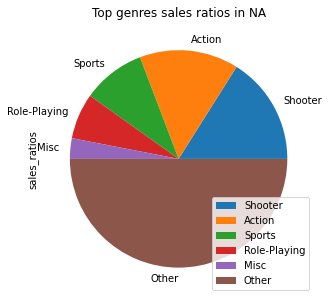



The sales shares of the top genres in EU are:



,sales_ratios
Action,0.275898
Shooter,0.242057
Sports,0.168945
Role-Playing,0.104071
Racing,0.052202
Other,0.843173


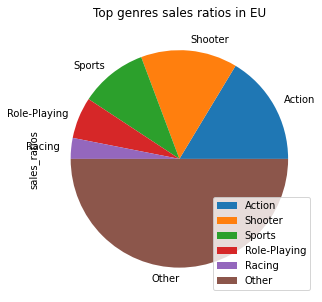



The sales shares of the top genres in JP are:



,sales_ratios
Role-Playing,0.334730
Action,0.317757
Fighting,0.068428
Misc,0.060264
Shooter,0.052315
Other,0.833494


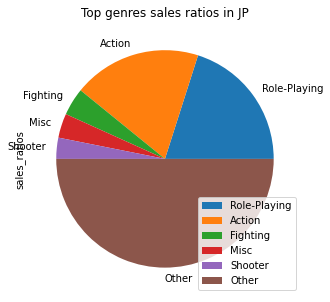

In [93]:
# Calculating the sales share of the top genres in different regions
top_num = 5 # Number of top genres to find
regions = ['na', 'eu', 'jp']
for region in regions:
    top_genres_share = data_relevant_years.pivot_table(index='genre',
                                                       values='{}_sales'.format(region),
                                                       aggfunc='sum') \
                        .sort_values('{}_sales'.format(region), ascending=False).reset_index()
    # Calculating the total amount of sales
    total_sales = top_genres_share['{}_sales'.format(region)].sum()
    # Adding the sales ratio
    top_genres_share['sales_ratios'] = top_genres_share['{}_sales'.format(region)] / total_sales
    # Keeping top genres
    top_genres_share = top_genres_share.loc[0:top_num-1]
    # Adding the data of the non-top genres
    top_genres_share.loc[top_num,:] = \
        ['Other', top_genres_share['{}_sales'.format(region)].sum(), top_genres_share['sales_ratios'].sum()]
    # Keeping the relevant data
    top_genres_share = top_genres_share.set_index('genre') \
        .rename_axis(None, axis="index").pop('sales_ratios').to_frame()

    # Presenting results
    print('The sales shares of the top genres in {} are:\n'.format(region.upper()))
    display(top_genres_share)
    print('\n')

    plot = top_genres_share.plot(y='sales_ratios', kind='pie', figsize=(5,5))
    plt.title('Top genres sales ratios in {}'.format(region.upper()))
    plt.legend(loc='lower right')
    plt.show()
    print('\n')

We see that "Shooter, "Action", and "Role-Playing" games succeed in all of the regions. This probably happens due to the similarity of the tastes of the crowds - gamers stay gamers everywhere - and due to the similar emotions of excitement these genres generate. In additon, the successful genres have the biggest companies behind them - and good games become popular and are considered good everywhere. We also see that the top 4 genres are identical between NA and EU, since the western crowds have similar tastes. In Japan however, role-playing games are leading in sales, which points to a gaming culture difference. There even exists a genre called "Japanse role-playing game".

### ESRB ratings

In [94]:
# Checking if ESRB ratings affect sales in individual regions
regions = ['na', 'eu', 'jp']
for region in regions:
    pivot_sales_rating = data_relevant_years.pivot_table(index='rating',
                                             values='{}_sales'.format(region),
                                             aggfunc='sum') \
                        .sort_values('{}_sales'.format(region), ascending=False)
    print('The sales in {} for the different ESRB ratings are:\n'.format(region.upper()))
    display(pivot_sales_rating)
    print('\n')

The sales in NA for the different ESRB ratings are:



,na_sales
rating,
M,96.42
None,64.72
E,50.74
T,38.95
E10+,33.23




The sales in EU for the different ESRB ratings are:



,eu_sales
rating,
M,93.44
None,58.95
E,58.06
T,34.07
E10+,26.16




The sales in JP for the different ESRB ratings are:



,jp_sales
rating,
None,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


ESRB ratings affect the sales in a similar manner in the west - the most sold games are rated suitable for matures, everyone and teens. In Japan these are still the top 3 most sold ratings, but the order is teens, everyone and matures. This makes sense since these are the largest crowds of customers. In addition, there are much more games created for these crowds to begin with. The less sold ratings are everyone over 10, which makes sense for the same reasons. These games are made for very small crowds and very few of them exist. The difference between the east and the west once again originates in the cultural difference, which is expressed in different gamer crowds.

### Conclusions

The top five platforms for each of the regions are:
- The top platforms in NA are: PS4, XOne, X360, 3DS, PS3.
- The top platforms in EU are: PS4, XOne, PS3, PC, 3DS.
- The top platforms in JP are: 3DS, PS4, PSV, PS3, WiiU.

We see that the top platforms in all of the regions have a similar behavior in their sales shares - the most popular platform has 30%-50% of the shares, and the less popular a platform gets, the more its share shrinks. That's because when a product becomes successful, the more it can overshadow its competitors due to its greater quality and advertising. We also see similar platforms appearing in all of the regions. This can be explained by a good platform becoming popular and considered good everywhere. The differences in the popularities within the top platforms in the different regions can be explained by their origin, which has a strong effect. The XBox is manufactured in the NA, and is indeed the 2nd most popular in the west, but it doesn't even reach the top 5 in Japan. Nintendo consoles behave the opposite - they're manufactured in Japan and are the most popular there, but they're less popular in the other regions.

The top five genres for each of the regions are:
- The top genres in NA are: Shooter, Action, Sports, Role-Playing, Misc.
- The top genres in EU are: Action, Shooter, Sports, Role-Playing, Racing.
- The top genres in JP are: Role-Playing, Action, Fighting, Misc, Shooter.

We see that "Shooter, "Action", and "Role-Playing" games succeed in all of the regions. This probably happens due to the similarity of the tastes of the crowds - gamers stay gamers everywhere - and due to the similar emotions of excitement these genres generate. In additon, the successful genres have the biggest companies behind them - and good games become popular and are considered good everywhere. We also see that the top 4 genres are identical between NA and EU, since the western crowds have similar tastes. In Japan however, role-playing games are leading in sales, which points to a gaming culture difference. There even exists a genre called "Japanse role-playing game".

ESRB ratings affect the sales in a similar manner in the west - the most sold games are rated suitable for matures, everyone and teens. In Japan these are still the top 3 most sold ratings, but the order is teens, everyone and matures. This makes sense since these are the largest crowds of customers. In addition, there are much more games created for these crowds to begin with. The less sold ratings are everyone over 10, which makes sense for the same reasons. These games are made for very small crowds and very few of them exist. The difference between the east and the west once again originates in the cultural difference, which is expressed in different gamer crowds.

## Testing hypotheses

### Hypothesis about platforms

In [95]:
# Testing the hypothesis: The average user ratings of the Xbox One and PC platforms are the same
# Creating the samples for testing
sample_user_score_xone = data_relevant_years.query('platform == "XOne"')['user_score']
sample_user_score_pc = data_relevant_years.query('platform == "PC"')['user_score']

# Exploring the samples
print('Printing statistics of the user scores of XBox One games:\n',
      sample_user_score_xone.describe(), '\n')

print('Printing statistics of the user scores of PC games:\n',
      sample_user_score_pc.describe())

Printing statistics of the user scores of XBox One games:
 count    228.000000
mean       6.844737
std        1.237277
min        1.600000
25%        6.200000
50%        7.350000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64 

Printing statistics of the user scores of PC games:
 count    151.000000
mean       6.529139
std        1.601815
min        1.400000
25%        5.700000
50%        7.100000
75%        7.500000
max        9.300000
Name: user_score, dtype: float64


In [96]:
# Testing the hyopthesis
print('The null hypothesis is that the average user ratings of the Xbox One and PC platforms are the same.')
print('The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are different.')

alpha = 0.05 # The critical statistical significance level
results = st.ttest_ind(sample_user_score_xone, sample_user_score_pc, equal_var=False)
print('The critical statistical significance level: {:.3f}'.format(alpha))
print('The p-value is: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha: # If the p-value is less than the critical statistical significance level
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis can't be rejected.")

The null hypothesis is that the average user ratings of the Xbox One and PC platforms are the same.
The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are different.
The critical statistical significance level: 0.050
The p-value is: 0.041
The null hypothesis is rejected.


### Hypothesis about genres

In [97]:
# Testing the hypothesis: The average user ratings of the "Action" and "Sports" genres are different
# Creating the samples for testing
sample_user_score_action = data_relevant_years.query('genre == "Action"')['user_score']
sample_user_score_sports = data_relevant_years.query('genre == "Sports"')['user_score']

# Exploring the samples
print('Printing statistics of the user scores of action games:\n',
      sample_user_score_action.describe(), '\n')

print('Printing statistics of the user scores of sports games:\n',
      sample_user_score_sports.describe())

Printing statistics of the user scores of action games:
 count    619.000000
mean       7.145234
std        1.022730
min        2.000000
25%        7.100000
50%        7.500000
75%        7.500000
max        9.000000
Name: user_score, dtype: float64 

Printing statistics of the user scores of sports games:
 count    161.000000
mean       5.705590
std        1.892592
min        0.200000
25%        4.300000
50%        6.100000
75%        7.500000
max        8.800000
Name: user_score, dtype: float64


In [98]:
# Testing the hyopthesis
print('The null hypothesis is that the average user ratings of action and sports games are the same.')
print('The alternative hypothesis is that the average user ratings of action and sports games are different.')

alpha = 0.05 # The critical statistical significance level
results = st.ttest_ind(sample_user_score_action, sample_user_score_sports, equal_var=False)
print('The critical statistical significance level: {:.3f}'.format(alpha))
print('The p-value is: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha: # If the p-value is less than the critical statistical significance level
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis can't be rejected.")

The null hypothesis is that the average user ratings of action and sports games are the same.
The alternative hypothesis is that the average user ratings of action and sports games are different.
The critical statistical significance level: 0.050
The p-value is: 0.000
The null hypothesis is rejected.


### Conclusions

For the hypothesis test regarding the user ratings of the Xbox One and PC, I have formulated the hypotheses as follows:
- Null hypothesis: The average user ratings of the Xbox One and PC platforms are equal.
- Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are different.

The hypotheses were formulated like so because when investigating whether a difference exists between populations, the null hypothesis should be formulated with an equality sign.

The criteria I used to test the hypotheses is an alpha value of 5% and non-equal population variances. I used this critical value because it's a relatively low and commonly used value. I assumed the variances of the original populations of the samples are different, since these populations don't have to have similar parameters. Some differences between the platforms is that the XBox has different models throughout the years, where old models go obsolete, it's extremely popular in some regions but much less popular in others, and the gaming controllers are very different.

The result of the test is that the null hypothesis is rejected - we reject the hypothesis that the average user ratings of the Xbox One and PC platforms are equal. This result can be explained by the peripheral controllers - perhaps the smaller portable controller of the XBox allows for a more comfortable gaming experience, which causes the mean scores of its games to be higher. In addition, more high quality games might be made for the XBox. Since PCs are owned by more people due to their varied usage, bigger developers might be put behind the XBox games in order to sell it.

This result can be explained by the existence of good and bad games for both platforms, and the existence of some games for both platforms, which will get similar user scores. User usually prefer one 
In addition, user ratings aren't strongly effected by the peripheral controllers, because players that prefer playing a game with one of the controllers won't buy it on both platforms, and won't rate it there. Finally, user scores are less objective, or in other words they're a bit random, and will cover similar ranges in both platforms.

---

For the hypothesis test regarding the average user ratings of the "Action" and "Sports" genres, I have formulated the hypotheses as follows:
- Null hypothesis: The average user ratings of the "Action" and "Sports" genres are equal.
- Alternative hypothesis: The average user ratings of the "Action" and "Sports" genres are different.

The hypotheses were formulated like so because when investigating whether a difference exists between populations, the null hypothesis should be formulated with an equality sign.

The criteria I used to test the hypotheses is an alpha value of 5% and non-equal population variances. I used this critical value because it's a relatively low and commonly used value. I assumed the variances of the original populations of the samples are different, since these populations don't have to have similar parameters. In particular, action games and sports games could have very different goals and thus very different followers behind them. 

The result of the test is that the null hypothesis is rejected - we reject the hypothesis that the average user ratings of the "Action" and "Sports" genres are equal. We see that action games are rated higher than sports games on average. This can result from sports games being more of a niche genre, since they have less varied goals available (they should match reality relatively much more), and there are few very popular sports per region. This causes less sports games being possible to be developed, so when the main titles aren't good enough there aren't many other titles that can raise the average scores. In addition, this causes less big developers make these games, and in particular make great games, which drops their scores.

## Overall conclusions

The overall conclusions from the main steps of the research are:
- The data contained some issues. I had to fill a lot of missing values and convert the data type of a couple of variables.

---

- Not every period has a significant amount of data, and the data before 1993 can be chosen to be disregarded, since it accounts for less than 2% of the entire data.
- The platforms with the greatest total sales are: PS2, X360, PS3, Wii, DS, PS.
- The platforms that used to be popular but don't sell anymore are: DS, PS, PS2.
- It generally takes about a decade for new platforms to appear and old ones to fade.
- I have taken the data since 2014 for further analysis, since it's the shifting point between the old and new generations of platforms.
- The platforms with the greatest total sales after selecting the relevant years are: PS4, XOne, 3DS.
- The platforms that are growing in sales are the PS4 and XBox One. The rest are shrinking in sales.
- The differences in total sales between platforms are significant.
- The differences in mean sales between platforms are significant.
- For the successful platforms, many very far outliers exist, which bring much higher profits in comparison to the average game.
- Comparing the sales of the games of one platform on other platforms, we see that the sales drop drastically in most of the other platforms.
- For the PS4, there's a medium correlation between the total sales and the critic scores, but practically no correlation with the user scores.
- The most successful genres are: Action, Shooter, Sports, Role-Playing, Misc.
- The most profitable genres don't necessarily possess the largest amounts of games, and there are no unique features in the histograms of the profits per game for the successful and unseccessful genres.

---

- The top platforms differ between the east and the west, where their manufacturing origin plays an important role - In particular, Nintendo platforms excel in Japan but aren't at the top of the top in the west. The top platforms behave similarly in their sales shares, where the more popular a platform is, the larger is its share.
- The top genres are similar between the regions, where "Shooter, "Action", and "Role-Playing" games are always succeessful, but "Role-Playing" games are preferred over the other two in Japan.
- ESRB rating affects the sales, where games for the more common crowds sale significantly most copies - for example games for matures, everyone and teens. There's a difference between the east and the west, where the order of the top 3 is flipped in Japan.

---

- We reject the hypothesis that the average user ratings of the Xbox One and PC platforms are equal.
- We reject the hypothesis that the average user ratings of the "Action" and "Sports" genres are equal.

I have identified the following patterns regarding whether a game succeeds or not. In order to increase the mean profits of Ice, I suggest investing the advertising budget in:
- Platforms: PS4 and XBox One.
- Years of release: As recent as possible, and never earlier than a decade.
- Genres: Action, Shooter, Sports, Role-Playing, and Misc.
- Scores: Games with high critic scores, disregarding user scores.
- ESRB ratings: For matures, everyone, and teens.

When advertising for specific regions, I'd suggest investing in the following:
- The top platforms in NA are: PS4, XOne, X360, 3DS, PS3.
- The top platforms in EU are: PS4, XOne, PS3, PC, 3DS.
- The top platforms in JP are: 3DS, PS4, PSV, PS3, WiiU.
- The top genres in NA are: Shooter, Action, Sports, Role-Playing, Misc.
- The top genres in EU are: Action, Shooter, Sports, Role-Playing, Racing.
- The top genres in JP are: Role-Playing, Action, Fighting, Misc, Shooter.
- The top ESRB ratings: For the west prioritize matures, everyone, and teens, and for Japan reverse this order.